# Import Library

In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import stanza
import re
import string
import tensorflow as tf

%matplotlib inline

# Exploratory Data Analysis

In [239]:
df_data = pd.read_csv('data/data_raw.csv')

df_data.head() 

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety


In [240]:
print(df_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53044 entries, 0 to 53043
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  52681 non-null  object
 1   status     53042 non-null  object
dtypes: object(2)
memory usage: 828.9+ KB
None


In [241]:
df_data.shape

(53044, 2)

In [242]:
# Data kosong
df_data.isnull().sum()

statement    363
status         2
dtype: int64

In [243]:
# Hapus data kosong
df_data.dropna(inplace = True)
df_data.isnull().sum()

statement    0
status       0
dtype: int64

In [244]:
# Cek duplikat data
duplicate_rows = df_data[df_data.duplicated()]
print("cek awal: ", duplicate_rows.shape)

# Hapus data duplikat
df_data = df_data.drop_duplicates()
print("setelah dihapus: ", df_data.shape)

cek awal:  (1592, 2)
setelah dihapus:  (51088, 2)


In [245]:
# hapus data >600 karakter
df_data = df_data[df_data['statement'].apply(len) <= 600]

In [246]:
df_data.shape

(35288, 2)

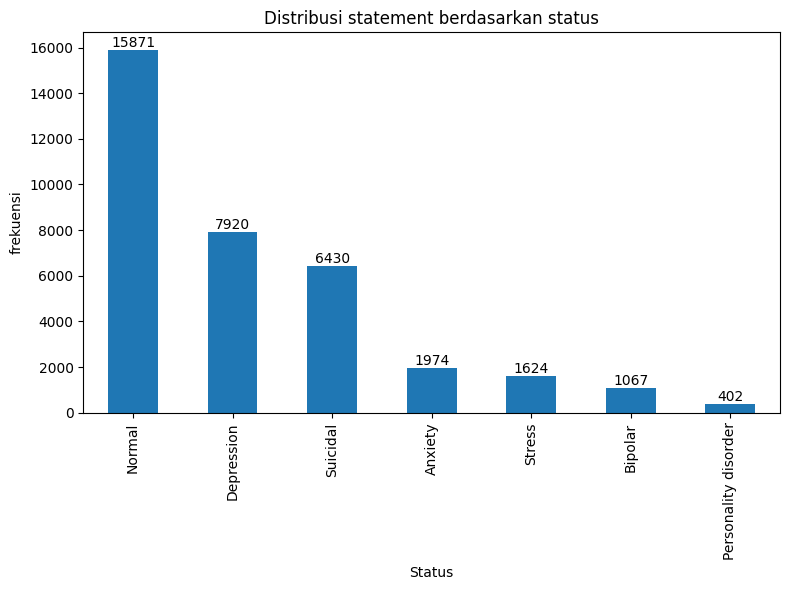

In [247]:
plt.figure(figsize=(8,6))

# get the unique status values and their counts
status_counts = df_data['status'].value_counts()

# create the bar plot
ax = status_counts.plot(kind='bar')

# add the count labels on top of each bar
for i, v in enumerate(status_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.title('Distribusi statement berdasarkan status')
plt.xlabel('Status')
plt.ylabel('frekuensi')
plt.tight_layout()
plt.show() 

In [248]:
df_data.head()

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety


In [249]:
# from deep_translator import GoogleTranslator
# from tqdm import tqdm

# # Inisialisasi translator
# translator = GoogleTranslator(source='en', target='id')

# # Fungsi untuk menerjemahkan teks dengan penanganan error
# def translate_text(text):
#     try:
#         return translator.translate(text)
#     except Exception as e:
#         print(f"Error translating text: {text}\nError: {e}")
#         return text  # Kembalikan teks asli jika terjadi error

# # Menggunakan tqdm untuk menampilkan progress bar
# tqdm.pandas()

# # Terapkan fungsi translate ke kolom 'statement'
# df_data['translated_statement'] = df_data['statement'].progress_apply(translate_text)

# df_data.to_csv('data_hasil_translate.csv', index=False)

# df_data.head()

In [250]:
df_data = pd.read_csv('data/data_hasil_translate.csv')
df_data.head()

,statement,status,translated_statement
0,oh my gosh,Anxiety,Ya ampun
1,"trouble sleeping, confused mind, restless hear...",Anxiety,"susah tidur, pikiran kacau, hati gelisah. Semu..."
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,"Semua salah, mundurlah sayang, maju terus ragu..."
3,I've shifted my focus to something else but I'...,Anxiety,Aku mengalihkan fokusku ke hal lain tapi aku m...
4,"I'm restless and restless, it's been a month n...",Anxiety,"Aku gelisah dan gelisah, sudah sebulan sekaran..."


In [ ]:
word_count = df_data['translated_statement'].apply(lambda x: len(x.split()))
max_word_count = word_count.max()

print(f"word count tertinggi: {max_word_count}")

Baris dengan word count tertinggi: 133


In [252]:
# Gabungkan semua teks di kolom 'statement' menjadi satu string
all_words = " ".join(df_data['translated_statement'])

# Tokenisasi dan hitung kata unik
unique_words = set(all_words.split())
unique_word_count = len(unique_words)

# Menampilkan hasil
print(f"Jumlah kata unik: {unique_word_count}")

Jumlah kata unik: 65908


In [253]:
from nltk.tokenize import word_tokenize
# Tokenisasi
tokenisasi = df_data['translated_statement'].apply(word_tokenize)

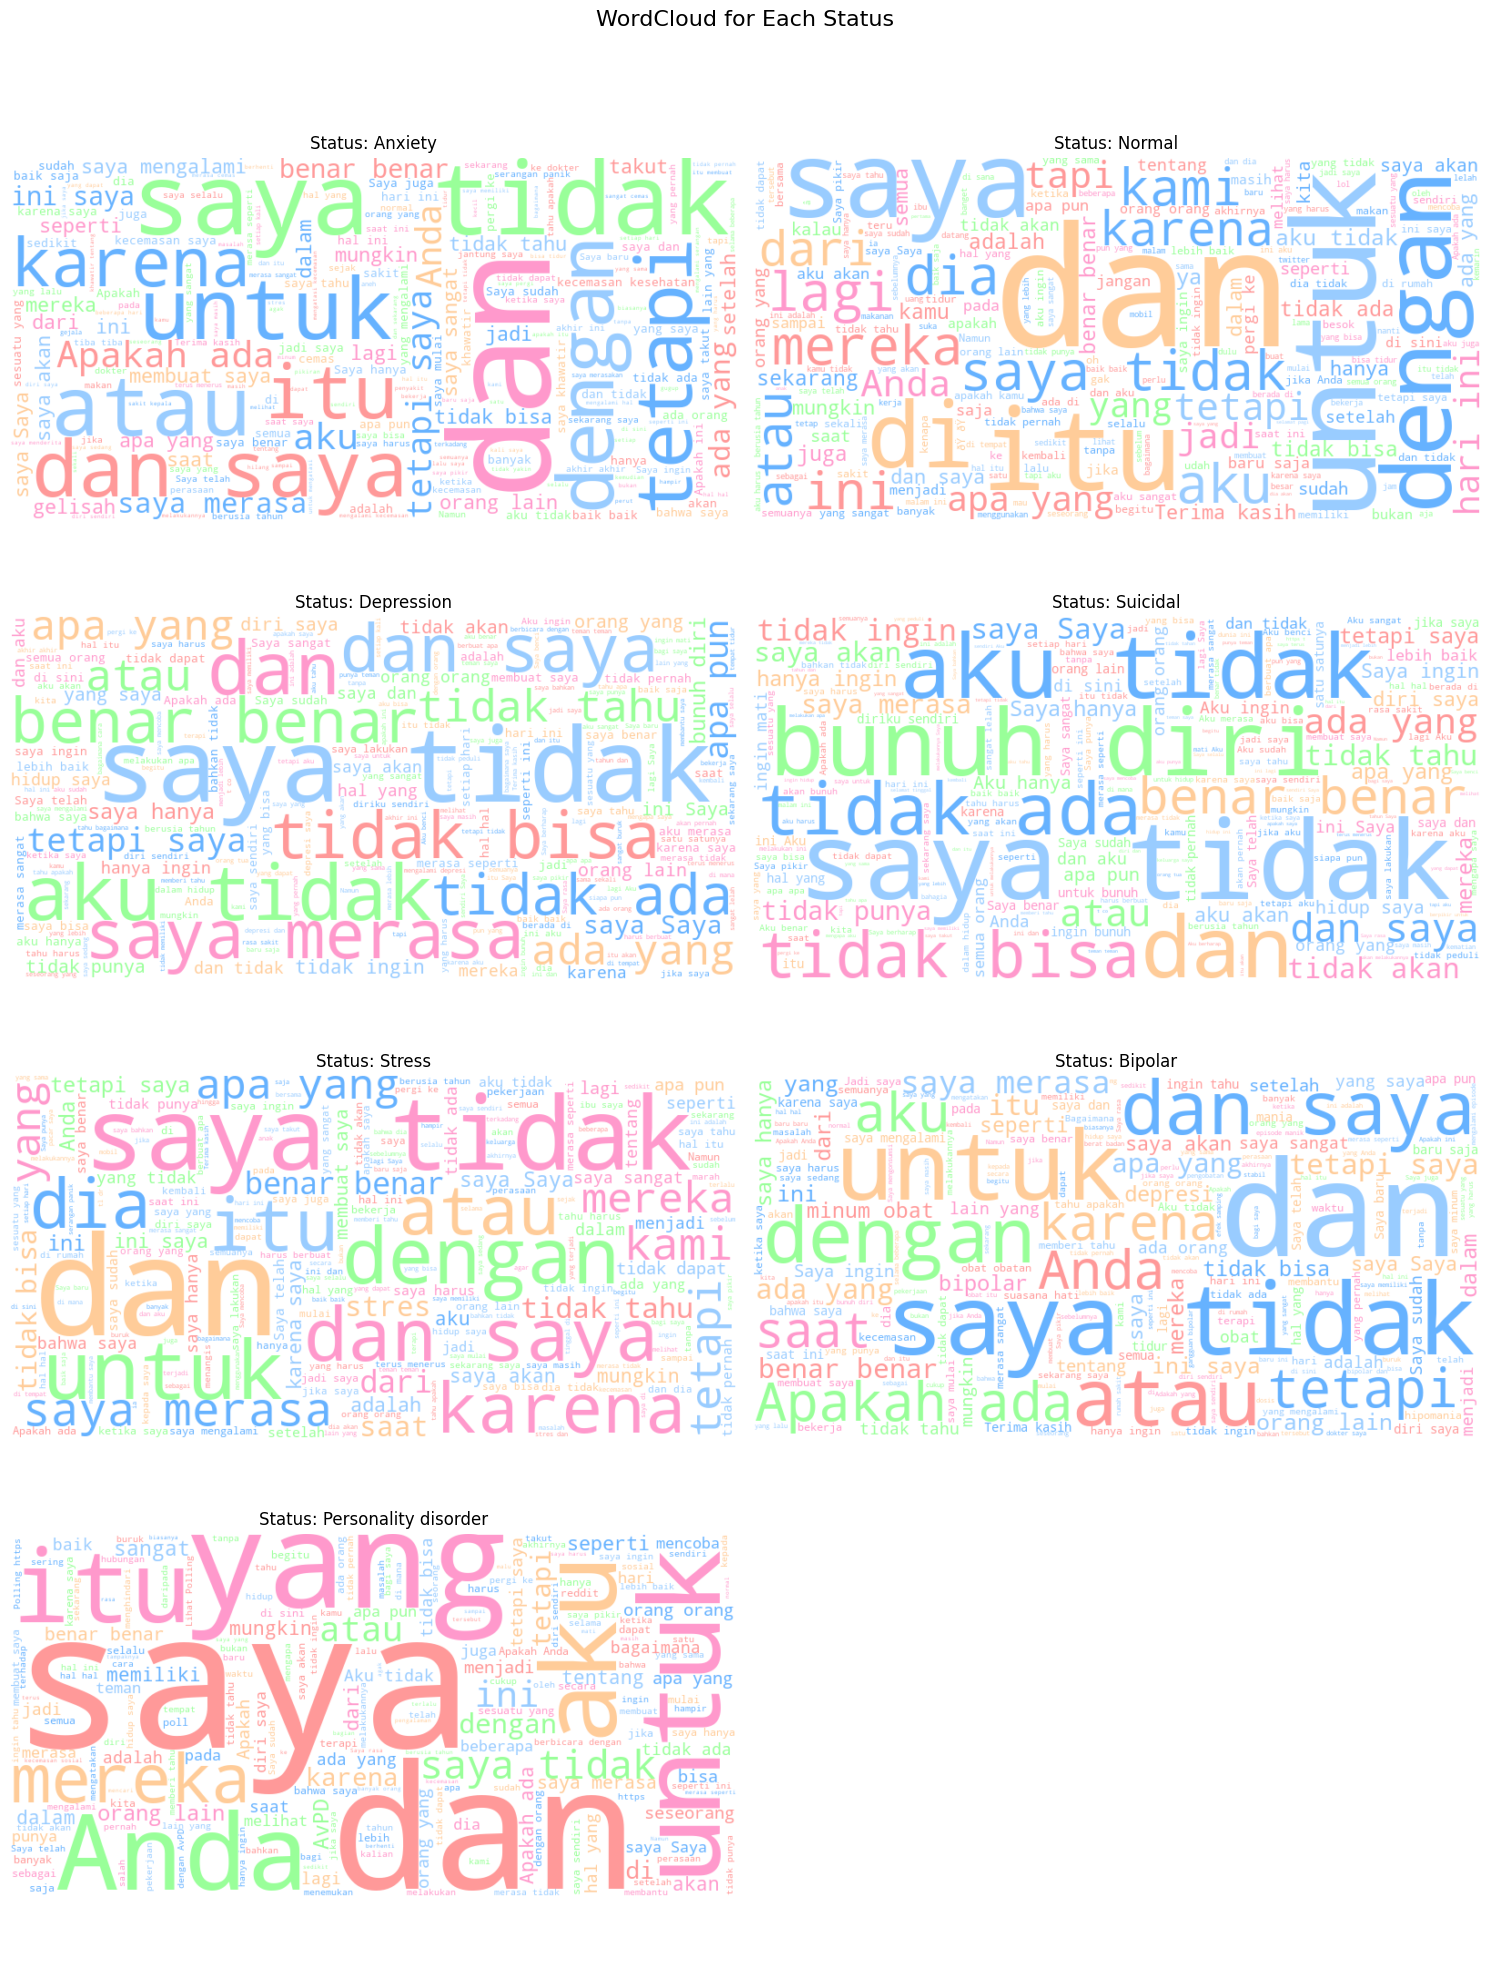

In [254]:
from wordcloud import WordCloud

# Ambil kategori unik dari kolom 'status'
statuses = df_data['status'].unique()

# Tentukan daftar warna untuk WordCloud
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC', '#99CCFF']

# Fungsi untuk menentukan warna
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return random.choice(colors)

# Buat subplots (4 baris x 2 kolom)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
fig.suptitle('WordCloud for Each Status', fontsize=16)  # Judul utama

# Iterasi untuk setiap status
for i, status in enumerate(statuses):
    # Gabungkan tokenisasi untuk status saat ini
    tokens_data = ' '.join([' '.join(token) for token, label in zip(tokenisasi, df_data['status']) if label == status])

    # Buat WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate(tokens_data)

    # Tentukan posisi subplot (baris dan kolom)
    row = i // 2  # Baris
    col = i % 2   # Kolom

    # Plot WordCloud ke subplot
    axes[row, col].imshow(wordcloud, interpolation='bilinear')
    axes[row, col].axis('off')  # Matikan axis
    axes[row, col].set_title(f'Status: {status}', fontsize=12)

# Sembunyikan subplot yang tidak terpakai
if len(statuses) % 2 != 0:  # Jika jumlah status ganjil
    axes[-1, -1].axis('off')

# Tampilkan plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [255]:
df_data.head()

,statement,status,translated_statement
0,oh my gosh,Anxiety,Ya ampun
1,"trouble sleeping, confused mind, restless hear...",Anxiety,"susah tidur, pikiran kacau, hati gelisah. Semu..."
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,"Semua salah, mundurlah sayang, maju terus ragu..."
3,I've shifted my focus to something else but I'...,Anxiety,Aku mengalihkan fokusku ke hal lain tapi aku m...
4,"I'm restless and restless, it's been a month n...",Anxiety,"Aku gelisah dan gelisah, sudah sebulan sekaran..."


In [256]:
df_data.to_csv('data/data_hasil_EDA.csv', index=False)

# Pre-Processing

In [257]:
df_data = pd.read_csv('data/data_hasil_EDA.csv')
# df_data.shape
df_data.head()

,statement,status,translated_statement
0,oh my gosh,Anxiety,Ya ampun
1,"trouble sleeping, confused mind, restless hear...",Anxiety,"susah tidur, pikiran kacau, hati gelisah. Semu..."
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,"Semua salah, mundurlah sayang, maju terus ragu..."
3,I've shifted my focus to something else but I'...,Anxiety,Aku mengalihkan fokusku ke hal lain tapi aku m...
4,"I'm restless and restless, it's been a month n...",Anxiety,"Aku gelisah dan gelisah, sudah sebulan sekaran..."


In [ ]:
vocab_size = 65908

In [259]:
# 0. Cleaning Text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+|\[.*?\]\(.*?\)', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r'\s+', ' ', text)

    return text

In [260]:
# 1. Convert text to lowercase
def to_lower(text):
    return text.lower()

In [261]:
# 2. Remove stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stop_words = set(factory.get_stop_words())

# List stopword tambahan
manual_stopwords = {"aku", "kamu", "dia", "mereka", "kita", "kami", "mu", "ku", "nya", "itu", "ini", "sini", "situ", "sana", "begitu", "yaitu", "yakni", 
                    "walaupun", "meskipun", "agar", "biar", "supaya", "akan", "telah", "baru", "lagi", "masih", "sekarang", "tadi", "kemarin", "nanti", 
                    "besok", "lalu", "kemudian", "sambil", "serta", "tetapi", "melainkan", "sehingga", "sebab", "karena", "hanya", "saja", "justru", "bahkan", 
                    "memang", "kan", "lah", "pun", "dong", "lho", "kok", "deh", "ya", "nah", "aduh", "oh", "eh", "loh", "seperti", "bagai", "bagaikan", 
                    "umpama", "ibarat", "laksana", "anda", "gua", "elo", "dong", "toh", "lagi", "apalagi", "yang", "untuk", "ke", "dari", "pada", "dengan", 
                    "oleh", "tanpa", "antara", "di", "sebuah", "seorang", "para", "bagi", "atas", "dalam", "namun", "demikian", "juga", "malah", "malahan", 
                    "berikut", "tersebut", "jadi", "adalah", "sebagai", "bukan", "tidak", "iya", "nggak", "ga", "enggak", "sangat", "paling", "amat", "cukup", 
                    "lebih", "kurang", "begitu", "maupun", "apalagi", "misalnya", "sekalipun", "meski", "ketika", "dimana", "siapa", "apa", "kapan", "bagaimana", 
                    "selain", "setelah", "sebelum", "sesudah", "hingga", "selama", "sementara", "sampai", "kemana", "darimana", "kenapa", "mengapa",
                    "wkwk", "haha", "hehe", "hihi", "loh", "yah", "udah", "aja", "banget", "abis", "gitu", "tau", "doang", "nih", "tuh", "kayak", "ngapain", 
                    "nggak", "ngga", "yaudah", "yaelah", "anjay", "anjir", "ciyee", "btw", "cmiiw", "gw", "gua", "gue", "gak", "sih", "loh", "dong", "malah", 
                    "makanya", "kenapa", "ngapain", "apaan", "mau", "ye", "cie", "ciee", "oke", "ok", "sip", "bro", "sis", "mantul", "tapi", "emang", "ya", 
                    "masa", "sumpah", "padahal", "daripada", "udah", "ntar", "yaudah", "bang", "cek", "makasih", "terus", "anj", "kalo", "ntar", "sama", 
                    "soalnya", "jangan", "kek", "kayaknya", "lah", "masih", "eh", "gak", "loh", "kan"
                    }

# Fungsi untuk menghapus stopword
def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word.lower() not in stop_words]
    words = [word for word in words if word.lower() not in manual_stopwords]
    return ' '.join(words)

In [262]:
# Inisialisasi pipeline Stanza untuk bahasa Indonesia ('id')
nlp = stanza.Pipeline('id', processors='tokenize,lemma', use_gpu=False)

# Fungsi lemmatization
def lemmatize_text(text):
    doc = nlp(text)
    sentences = []

    # Iterasi setiap kalimat dalam dokumen yang sudah diproses
    for sentence in doc.sentences:
        lemmas = [word.lemma for word in sentence.words]
        sentences.append(' '.join(lemmas))

    return ' '.join(sentences)

2024-11-29 13:53:42 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-11-29 13:53:42 INFO: Downloaded file to C:\Users\RafiAchmadfr\stanza_resources\resources.json
2024-11-29 13:53:42 WARNING: Language id package default expects mwt, which has been added
2024-11-29 13:53:42 INFO: Loading these models for language: id (Indonesian):
| Processor | Package      |
----------------------------
| tokenize  | gsd          |
| mwt       | gsd          |
| lemma     | gsd_nocharlm |

2024-11-29 13:53:42 INFO: Using device: cpu
2024-11-29 13:53:42 INFO: Loading: tokenize
c:\Users\RafiAchmadfr\AppData\Local\Programs\Python\Python312\Lib\site-packages\stanza\models\tokenization\trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the defau

In [263]:
from nltk.tokenize import word_tokenize
from tqdm import tqdm

tqdm.pandas(desc="Preprocessing Text")
def preprocessing_text(text_raw):
    # Cleaning
    text_raw = clean_text(text_raw)
    
    # Convert to lowercase
    text_raw = to_lower(text_raw)
    
    # Remove stopwords
    text_raw = remove_stopwords(text_raw)
    
    # Lemmatize
    text_preprocessing = lemmatize_text(text_raw)
    
    # Tokenized
    text_tokenized = word_tokenize(text_preprocessing)

    return text_preprocessing, text_tokenized


In [264]:
df_data[['preprocessed_text', 'tokenized_text']] = df_data['translated_statement'].progress_apply(preprocessing_text).apply(pd.Series)
df_data.head()

Preprocessing Text: 100%|██████████| 35288/35288 [28:19<00:00, 20.76it/s] 


,statement,status,translated_statement,preprocessed_text,tokenized_text
0,oh my gosh,Anxiety,Ya ampun,ampun,[ampun]
1,"trouble sleeping, confused mind, restless hear...",Anxiety,"susah tidur, pikiran kacau, hati gelisah. Semu...",susah tidur pikir kacau hati gelisah semua tak...,"[susah, tidur, pikir, kacau, hati, gelisah, se..."
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,"Semua salah, mundurlah sayang, maju terus ragu...",semua salah mundur lah sayang maju ragu tetapl...,"[semua, salah, mundur, lah, sayang, maju, ragu..."
3,I've shifted my focus to something else but I'...,Anxiety,Aku mengalihkan fokusku ke hal lain tapi aku m...,alih fokusku khawatir,"[alih, fokusku, khawatir]"
4,"I'm restless and restless, it's been a month n...",Anxiety,"Aku gelisah dan gelisah, sudah sebulan sekaran...",gelisah gelisah sebul nak maksudmu,"[gelisah, gelisah, sebul, nak, maksudmu]"


In [265]:
word_count = df_data['preprocessed_text'].apply(lambda x: len(x.split()))
max_word_count = word_count.max()

print(f"word count tertinggi: {max_word_count}")

word count tertinggi: 99


In [267]:
df_data.to_csv('data/data_hasil_prepos.csv', index=False)